# Calipso

Calipso products can be downloaded by using the ``download`` method of the corresponding product object. For this example we will have a look at the cloud layer top and base height at 333 m resolution contained in the 333mCLay product.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from datetime import datetime
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)

The variable ``files`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

## 333mCLay

In [3]:
from pansat.products.satellite.calipso import clay333m
# from pansat.products.satellite.calipso import CalipsoProduct

files_clay = clay333m.download(t_0, t_1)
dataset = clay333m.open(files_clay[0])
display(dataset)

Please enter your pansat user password:


<xarray.Dataset>
Dimensions:              (layers: 5, one: 1, rays: 55920)
Coordinates:
  * rays                 (rays) int64 0 1 2 3 4 ... 55916 55917 55918 55919
  * layers               (layers) int64 0 1 2 3 4
  * one                  (one) int64 0
    latitude             (rays) float32 75.01558 75.01808 ... -64.56511
    longitude            (rays) float32 13.138031 13.131451 ... -163.55202
Data variables:
    layer_top_altitude   (rays, layers) float32 1.130534 -9999.0 ... -9999.0
    layer_base_altitude  (rays, layers) float32 0.86109054 -9999.0 ... -9999.0
    num_layers           (rays, one) int8 1 1 1 2 1 1 1 1 1 ... 1 1 1 1 1 1 1 1

Text(0.0, 1.0, '(a) Cloud layers height')

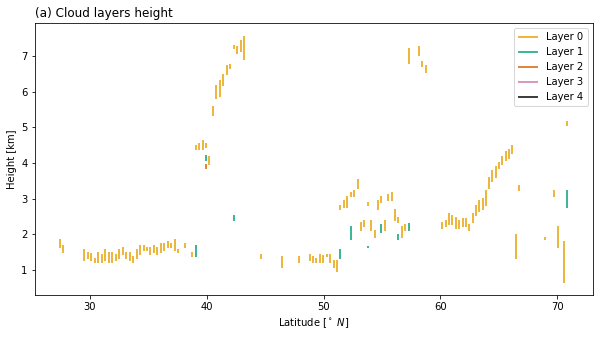

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Convert -9999 to Nan
tops = dataset.layer_top_altitude.where(dataset.layer_top_altitude != -9999.)
bases = dataset.layer_base_altitude.where(dataset.layer_base_altitude != -9999.)

start = 10000
end = 25000
stride = 100
tops = tops[start:end:stride, :]
bases = bases[start:end:stride, :]
lats = dataset["latitude"][start:end:stride]

plt.figure(figsize=(10, 5))
cols = ["#E69F00", "#009E73", "#D55E00", "#CC79A7", "#000000"]
for i in range(5):
    plt.vlines(lats, bases[:, i], tops[:, i], color=cols[i], label=f"Layer {i}")
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Height [km]");
plt.legend()
plt.title("(a) Cloud layers height", loc="left")

No handles with labels found to put in legend.


Text(0.0, 1.0, '(b) Number of cloud layers')

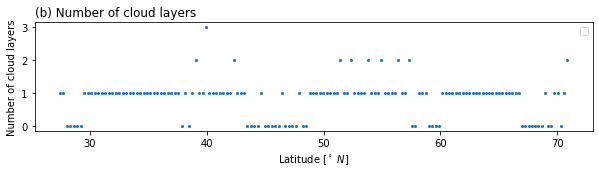

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

start = 10000
end = 25000
stride = 100
num_layers = dataset.num_layers[start:end:stride]
lats = dataset["latitude"][start:end:stride]

plt.figure(figsize=(10, 2))
plt.plot(lats, num_layers, "o", markersize=2)
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Number of cloud layers");
plt.legend()
plt.title("(b) Number of cloud layers", loc="left")